In [1]:
import numpy as np
import pygimli as pg
import pygimli.meshtools as mt
import pygimli.physics.traveltime as tt

In [2]:
data = tt.createRAData(np.arange(41)*2, shotDistance=5)
print(data)

Data: Sensors: 41 data: 360, nonzero entries: ['g', 's', 'valid']


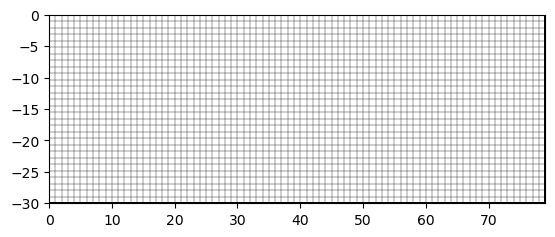

In [3]:
grid = mt.createGrid(np.arange(min(pg.x(data)), max(pg.x(data)), step=1, dtype=float), np.linspace(-30, 0, 30))
pg.show(grid);

(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x1d62c60d6d0>)

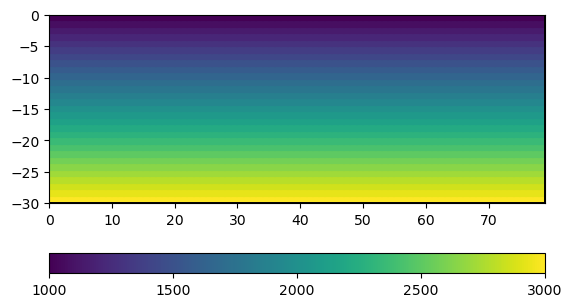

In [4]:
slo = tt.createGradientModel2D(data, grid, vTop=1000, vBot=3000)
pg.show(grid, 1./slo)

In [5]:
data = tt.simulate(mesh=grid, scheme=data, slowness=slo)

20/01/23 - 09:31:27 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.


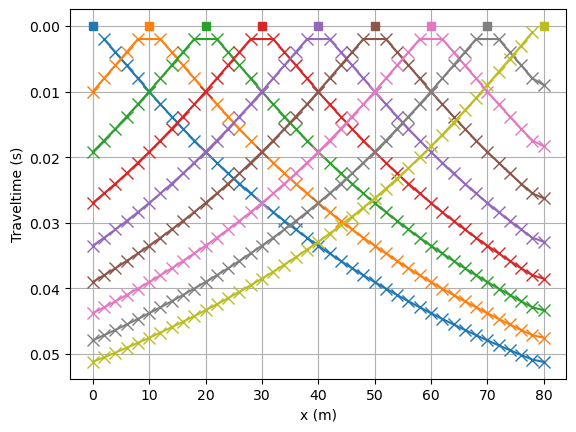

In [6]:
fig, ax = pg.plt.subplots()
tt.drawFirstPicks(ax, data);

(<matplotlib.image.AxesImage at 0x1d663be1490>,
 <matplotlib.colorbar.Colorbar at 0x1d663c26c40>)

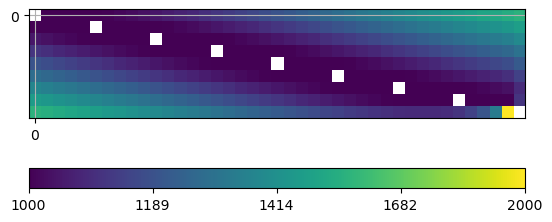

In [7]:
tt.showVA(data)

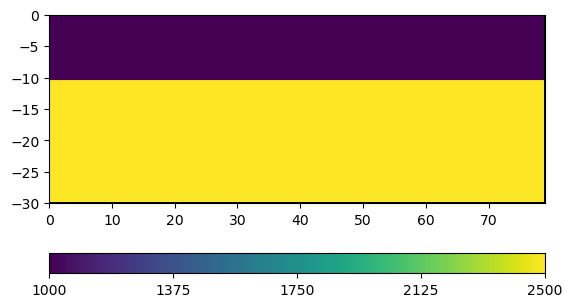

In [8]:
velLayers = np.ones(grid.cellCount()) * 1000
velLayers[pg.y(grid.cellCenters()) < -10] = 2500
pg.show(grid, velLayers);

20/01/23 - 09:31:29 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.


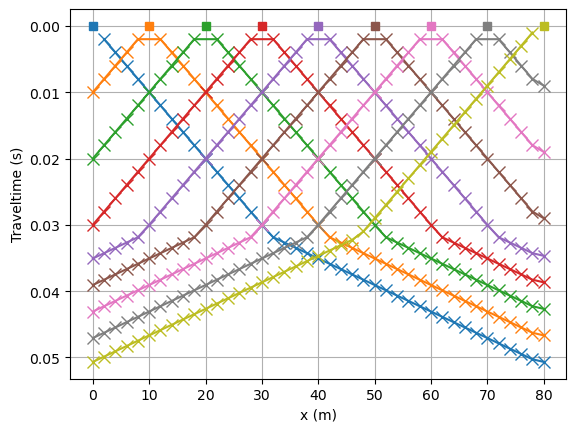

In [9]:
dataLayers = tt.simulate(mesh=grid, scheme=data, vel=velLayers)
fig, ax = pg.plt.subplots()
tt.drawFirstPicks(ax, dataLayers);

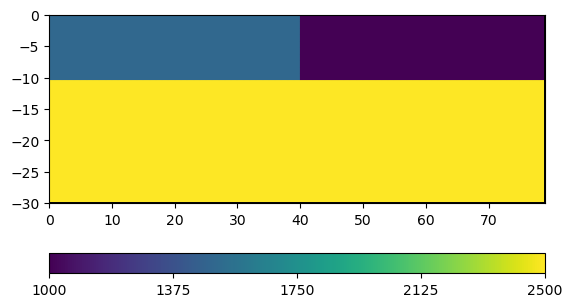

In [10]:
cx = pg.x(grid.cellCenters())
cy = pg.y(grid.cellCenters())
velLayers = np.ones(grid.cellCount()) * 1000
velLayers[cy < -10] = 2500
velLayers[(cy >= -10) & (cx < 40)] = 1500
pg.show(grid, velLayers);

20/01/23 - 09:31:31 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.


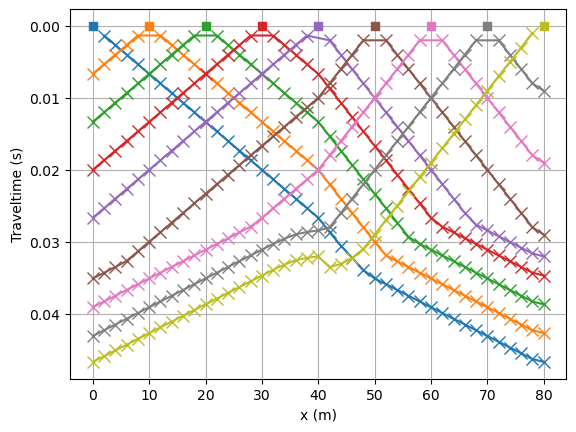

In [11]:
dataLayers = tt.simulate(mesh=grid, scheme=data, vel=velLayers)
fig, ax = pg.plt.subplots()
tt.drawFirstPicks(ax, dataLayers);

20/01/23 - 09:31:33 - pyGIMLi - INFO - Found 1 regions.
20/01/23 - 09:31:33 - pyGIMLi - ERROR - <class 'pygimli.physics.traveltime.TravelTimeManager.TravelTimeManager'>.checkError(c:\Guenther.T\src\gimli\gimli\pygimli\physics\traveltime\TravelTimeManager.py:93)
DataContainer has no "err" values. Fallback to 3%
20/01/23 - 09:31:33 - pyGIMLi - INFO - Creating forward mesh from region infos.
20/01/23 - 09:31:33 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.
20/01/23 - 09:31:33 - pyGIMLi - INFO - Create gradient starting model. 500: 5000
20/01/23 - 09:31:33 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00149332 0.00132384 0.00158163 0.00166661 0.00181519 0.00185014
 0.00193707 0.00198169 0.00185443 0.00163058 0.00195491 0.00160645
 0.0018448  0.00167218 0.00186335 0.00192886 0.00180808 0.00159222
 0.00186602 0.00198831 0.00115043 0.00181256 0.00195362 0.00198987
 0.00185905 0.00164154 0.00195724 0.00147388 0.00156385 0.00193168
 0.00143499 0

20/01/23 - 09:31:33 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x000001D664D82A90>
Data transformation: <pgcore._pygimli_.RTrans object at 0x000001D664D82BD0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000001D667126520>
min/max (data): 1.0e-03/0.05
min/max (error): 3%/3%
min/max (start model): 2.0e-04/0.002
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 35.83 (dPhi = 94.49%) lam: 100
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 4.98 (dPhi = 85.75%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 1.88 (dPhi = 60.84%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 0.44 (dPhi = 73.83%) lam: 100.0


#############

(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x1d66722ff40>)

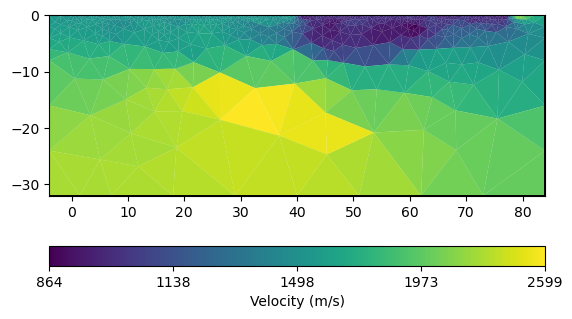

In [12]:
mgr = tt.TravelTimeManager(dataLayers)
mgr.invert(paraDX=0.25, lam=100, zWeight=0.2, verbose=True)
mgr.showResult()

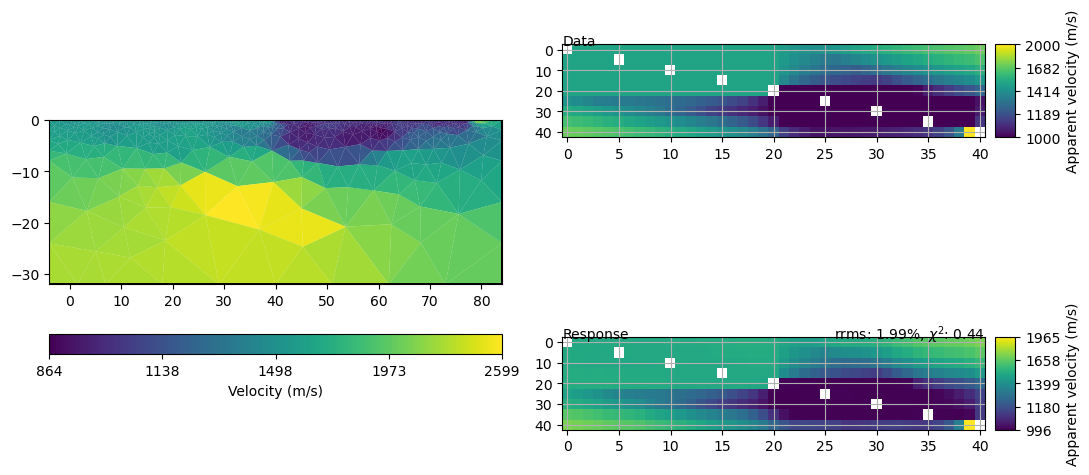

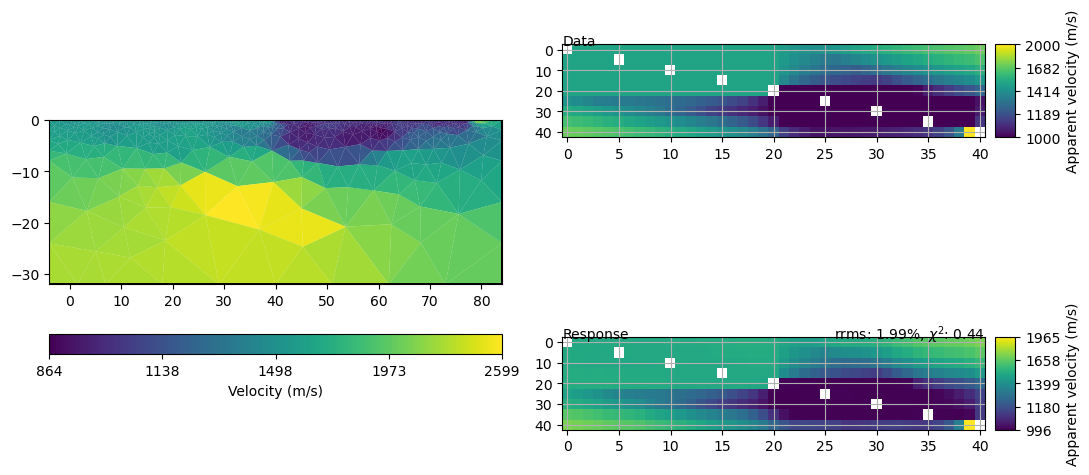

In [13]:
mgr.showResultAndFit()